# The Sparks Foundation

Task-1: Prediction using Supervised ML

Objective: Predict the percentage of a student based on the no. of study hours

Author: Ashutosh Pathak

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# Load dataset from given URL

url = "http://bit.ly/w-data"
df = pd.read_csv(url)

print("Data loaded successfully")

Data loaded successfully


In [5]:
# Extract the first ten data

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
# Check array size

df.shape

(25, 2)

In [7]:
# Find the total number of null values in both columns if any

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null value in the given dataset.

In [9]:
# Compute the statistical summary

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


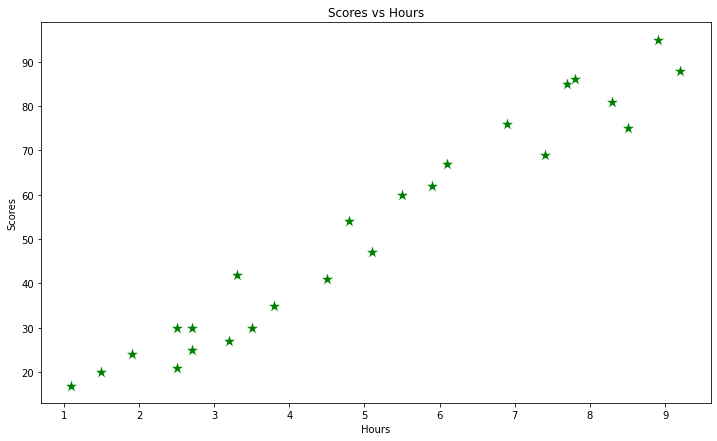

In [16]:
# Plot a scatterplot to understand the trend

plt.figure(figsize=(12,7))
sns.scatterplot(x='Hours', y='Scores', marker='*', color='g', s=200, data=df)

plt.title('Scores vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

The above scatterplot represents a linear relationship between 'Scores' and 'Hours'.

                                     ------- Prepare the data -------

In [18]:
# Set input and output

x = df[['Hours']]
y = df[['Scores']]

In [19]:
# Import Train-Test-Split method from Scikit-Learn

from sklearn.model_selection import train_test_split

In [22]:
# Split the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

-- Check the first five data of training and test sets --

In [23]:
x_train[0:5]

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1


In [24]:
x_test[0:5]

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [26]:
y_train[0:5]

,Scores
22,35
17,24
24,86
23,76
14,17


In [28]:
y_test[0:5]

,Scores
5,20
2,27
19,69
16,30
11,62


                                   ------- Train the Algorithm -------

In [29]:
# Import Linear Regression method from Scikit-Learn

from sklearn.linear_model import LinearRegression

In [32]:
# Train the Algorithm

model = LinearRegression()

model.fit(x_train, y_train)

print("Training completed.")

Training completed.


In [34]:
# Compute the Training accuracy

accuracy = model.score(x_train, y_train)

print('Training accuracy:', accuracy)

Training accuracy: 0.9515510725211552


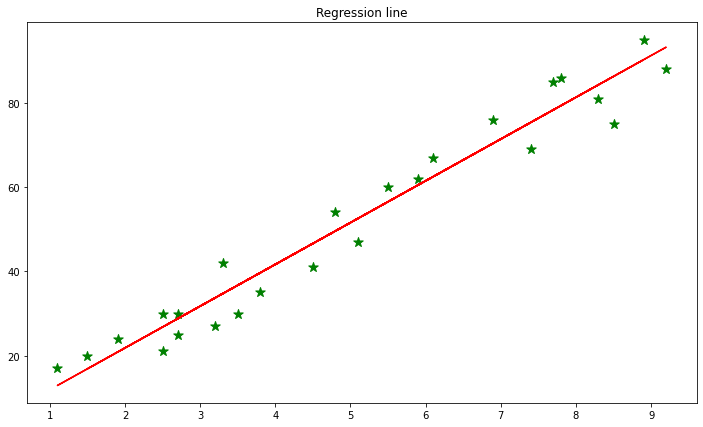

In [44]:
# Plot the regression line for the test data

line = model.coef_*x+model.intercept_

plt.figure(figsize=(12,7))
plt.scatter(x, y, marker='*', c='g', s=100)
plt.plot(x, line, color='r')

plt.title('Regression line')
plt.show()

                                       ------- Make Predictions -------

In [46]:
# Predict scores

y_pred = model.predict(x_test)

y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [47]:
# Check the test data

y_test

,Scores
5,20
2,27
19,69
16,30
11,62


                                     ------- Evaluate the model -------

In [49]:
# Import Metrics and Mean-Squared-Error from Scikit-Learn

from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [52]:
# Compute Mean-Absolute-Error and Mean-Squared-Error

MAE = metrics.mean_absolute_error(y_test, y_pred)

MSE = mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', MAE)

print('Mean Squared Error:', MSE)

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456


                            ------- Predict the score for 9.25 hours/day -------

In [54]:
hours = 9.25

score_prediction = model.predict([[hours]])

print('The predicted score if a student studies for',hours,'hrs per day is',score_prediction[0])

The predicted score if a student studies for 9.25 hrs per day is [93.69173249]
